In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD
from ML2_lib import RV_SGDAve

from sklearn.datasets import load_boston,load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
# ボストンの住宅価格　特徴量14 サンプル数506
real_data = load_boston()
x = real_data.data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = np.c_[x,np.ones(x.shape[0])]
w_init = np.zeros(x.shape[1]).reshape(1,-1)
y = real_data.target.reshape(1,-1)
y = y.T

In [16]:
# データセットを分割する関数の読み込み


# 訓練用データセットとテスト用データセットへの分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

son = loss.LinearQuadraticLoss()

In [17]:
k_list = [1,4,10,20]
dc_sgd = DC_SGD.DCSGDRealData(loss_type=son,c=1 ,lr=0.1)

In [18]:
tr_train_k = []
tr_test_k = []
final_mse = []
for k in k_list:
    dc_sgd.learn_data(k=k,w_init=w_init,x=x_train,y=y_train)

    _,tr_train = dc_sgd.transition(x_train,y_train)
    _,tr_test = dc_sgd.transition(x_test,y_test)
    tr_train_k.append(tr_train)
    tr_test_k.append(tr_test)
    final_mse.append(tr_test[-1])


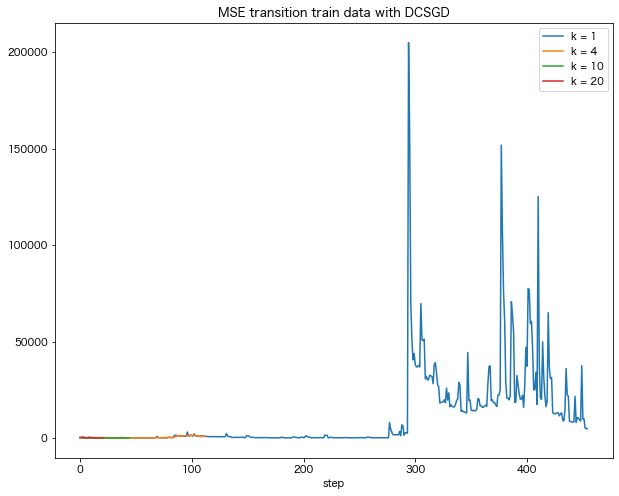

In [19]:

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("MSE transition train data with DCSGD")
for i in tr_train_k:
    ax1.plot(i)
ax1.set_xlabel("step")
leg = ax1.legend(labels=[f'k = {k}' for k in k_list])
plt.show()


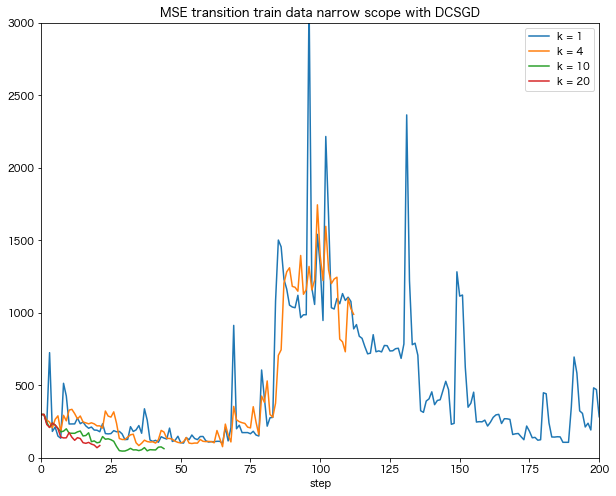

In [20]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_xlim(0,200)
ax1.set_ylim(0,3000)
ax1.set_title("MSE transition train data narrow scope with DCSGD")
for i in tr_train_k:
    ax1.plot(i)
leg = ax1.legend(labels=[f'k = {k}' for k in k_list])

ax1.set_xlabel("step")
plt.show()

In [21]:
rv_sgd = RV_SGDAve.RVSGDRealData(loss_type=son,c=1 ,lr=0.1)

In [22]:
# 最終的なMSE(テストデータ)
df = pd.DataFrame(np.array(final_mse).T,columns=k_list,index=["MSE"])
df

,1,4,10,20
MSE,7627.394847,2033.776882,66.070898,93.36784


In [23]:
tr_train_k = []
tr_test_k = []
final_mse = []
k_list = [3,4,10,20]
for k in k_list:
    rv_sgd.learn_data(k=k,w_init=w_init,x=x_train,y=y_train)

    tr_train = rv_sgd.transition(k,x_train,y_train)
    tr_test = rv_sgd.transition(k,x_test,y_test)
    tr_train_k.append(tr_train)
    tr_test_k.append(tr_test)
    final_mse.append(tr_test[-1])

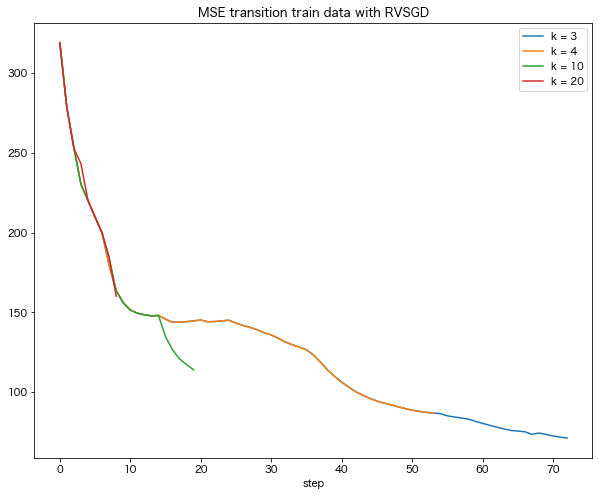

In [24]:

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("MSE transition train data with RVSGD")
for i in tr_train_k:
    ax1.plot(i)
ax1.set_xlabel("step")
leg = ax1.legend(labels=[f'k = {k}' for k in k_list])
plt.show()



In [25]:
# 最終的なMSE(テストデータ)
df = pd.DataFrame(np.array(final_mse).T,columns=k_list,index=["MSE"])
df

,3,4,10,20
MSE,52.694752,65.119228,171.622824,149.036285
